In [1]:
import sys
sys.path.append('../xrun')


In [2]:
import gzip
from pathlib import Path

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from sklearn.metrics import pairwise_distances, pairwise_distances_argmin_min

from xrun.data.loader import load_dataset
from xrun.data.run_info import RunInfo

import re

from pathlib import Path

import numpy as np
import pandas as pd

from IPython.core.display import HTML
from sklearn.metrics import pairwise_distances

from xrun.data.run_info import RunInfo

In [3]:
def extract_dataset(file_path):
    mappings = {
        'covtype': "Covertype",
        "enron": "Enron",
        "hardinstances/benchmark-k30": "Benchmark old ($k=30$)",
        "input/benchmark-k10": "Benchmark ($k=10$)",
        "input/benchmark-k20": "Benchmark ($k=20$)",
        "input/benchmark-k30": "Benchmark ($k=30$)",
        "input/benchmark-k40": "Benchmark ($k=40$)",
        "input/benchmark-k50": "Benchmark ($k=50$)",
        "nytimes.txt": "NYTimes",
        "nytimes.rp": "NYTimes+RP",
        "Tower": "Tower",
        "Census": "Census",
        "caltech101": "Caltech",
    }
    for k, v in mappings.items():
        if k in file_path:
            return v
    return 'Unmapped'

In [4]:
df_data = pd.read_csv('../data/cluster_curves.txt', header=None, names=["file_path", "k", "cost", "running_time"])
df_data['dataset'] = df_data.file_path.map(extract_dataset)

# Remove k < benchmark.k
for k in [20, 30, 40]:
    filtering = df_data.dataset.str.contains(f"k={k}") & (df_data.k < k)
    df_data = df_data[~filtering]
    

df_data["normalized_cost"] = df_data.groupby("dataset")["cost"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

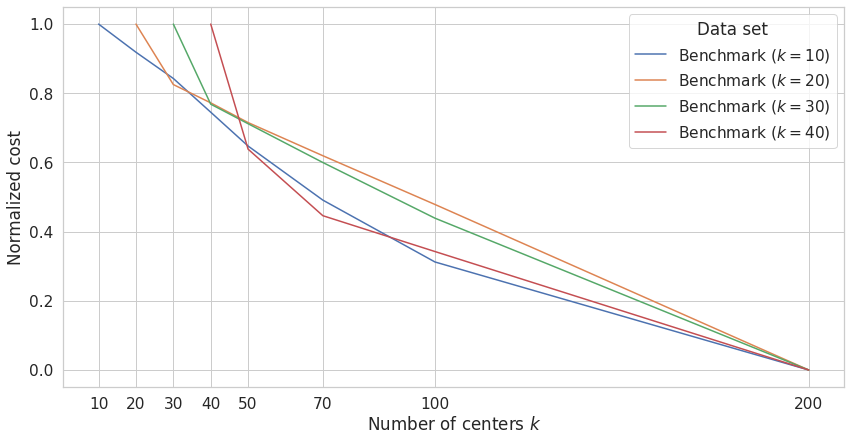

In [5]:
df_filtered = df_data[df_data.dataset.str.contains("Benchmark")]

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(14, 7))
    # sns.lineplot(data=df_data, x="k", y="normalized_cost", hue="dataset", ax=ax)
    sns.lineplot(data=df_filtered, x="k", y="normalized_cost", hue="dataset", ax=ax)
    ax.xaxis.set_ticks(df_data.k.unique())
    ax.set_xlabel("Number of centers $k$")
    ax.set_ylabel("Normalized cost")
    ax.legend(title="Data set")
    ax.set_title("");
    # fig.savefig(f"figures/cost-curves-benchmark.pdf", bbox_inches="tight")

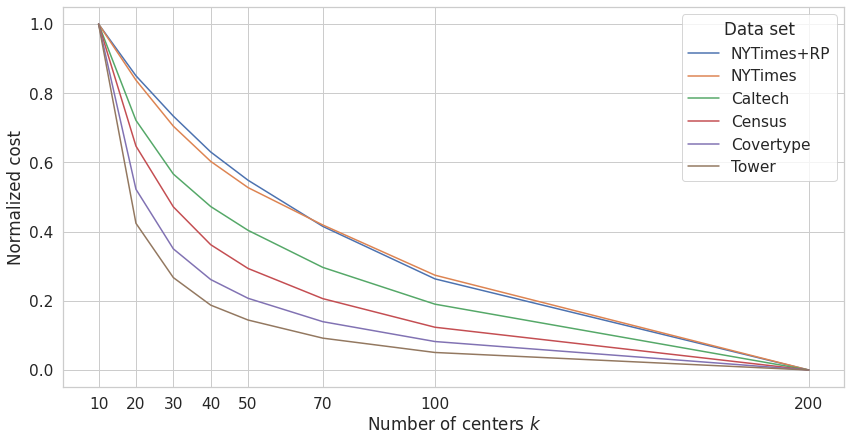

In [6]:
k_values = df_data.k.unique()
datasets = ["Tower", "Covertype", "Census", "Caltech", "NYTimes", "NYTimes+RP"]
df_filtered = df_data[df_data.dataset.isin(datasets)].copy()
df_filtered["sort_order"] = df_filtered.dataset.map(lambda x: datasets.index(x))
df_filtered.sort_values(by="sort_order", ascending=False, inplace=True)

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(14, 7))
    # sns.lineplot(data=df_data, x="k", y="normalized_cost", hue="dataset", ax=ax)
    sns.lineplot(data=df_filtered, x="k", y="normalized_cost", hue="dataset", ax=ax)
    ax.xaxis.set_ticks(k_values)
    ax.set_xlabel("Number of centers $k$")
    ax.set_ylabel("Normalized cost")
    ax.legend(title="Data set")
    ax.set_title("");
    # fig.savefig(f"figures/cost-curves-real-world-datasets.pdf", bbox_inches="tight")

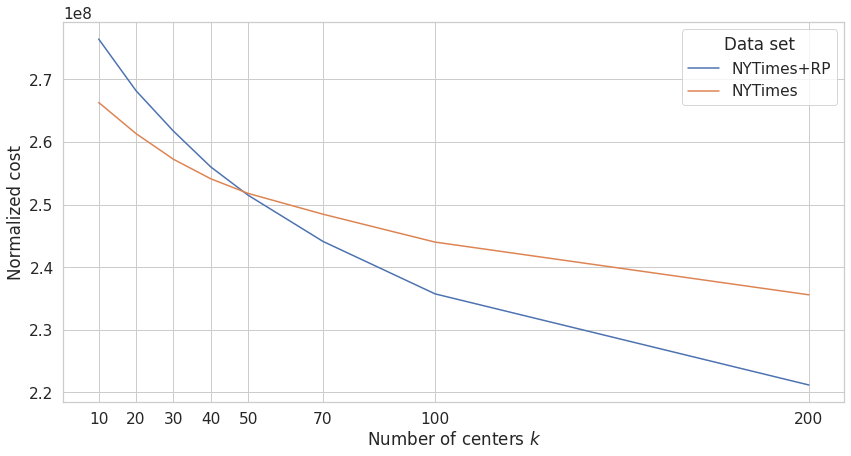

In [7]:
k_values = df_data.k.unique()
datasets = ["NYTimes", "NYTimes+RP"]
df_filtered = df_data[df_data.dataset.isin(datasets)].copy()
df_filtered["sort_order"] = df_filtered.dataset.map(lambda x: datasets.index(x))
df_filtered.sort_values(by="sort_order", ascending=False, inplace=True)

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(14, 7))
    # sns.lineplot(data=df_data, x="k", y="normalized_cost", hue="dataset", ax=ax)
    sns.lineplot(data=df_filtered, x="k", y="cost", hue="dataset", ax=ax)
    ax.xaxis.set_ticks(k_values)
    ax.set_xlabel("Number of centers $k$")
    ax.set_ylabel("Normalized cost")
    ax.legend(title="Data set")
    ax.set_title("");
    # fig.savefig(f"figures/cost-curves-real-world-datasets.pdf", bbox_inches="tight")

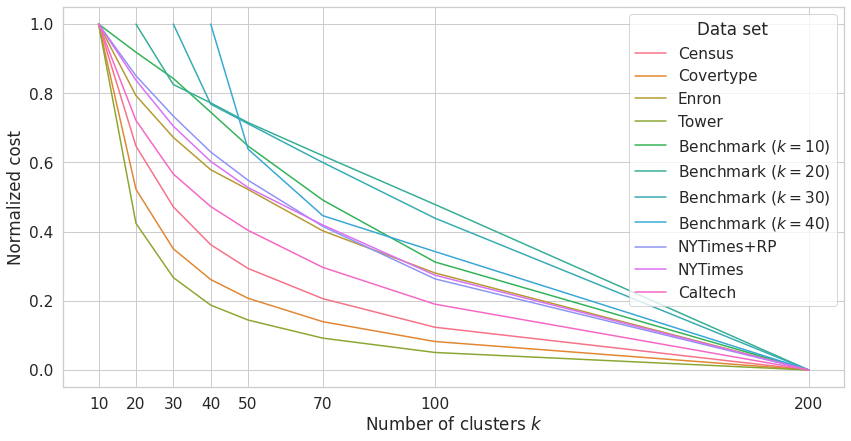

In [8]:
with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(14, 7))
    sns.lineplot(data=df_data, x="k", y="normalized_cost", hue="dataset", ax=ax)
    ax.xaxis.set_ticks(df_data.k.unique())
    ax.set_xlabel("Number of clusters $k$")
    ax.set_ylabel("Normalized cost")
    ax.legend(title="Data set")
    ax.set_title("");

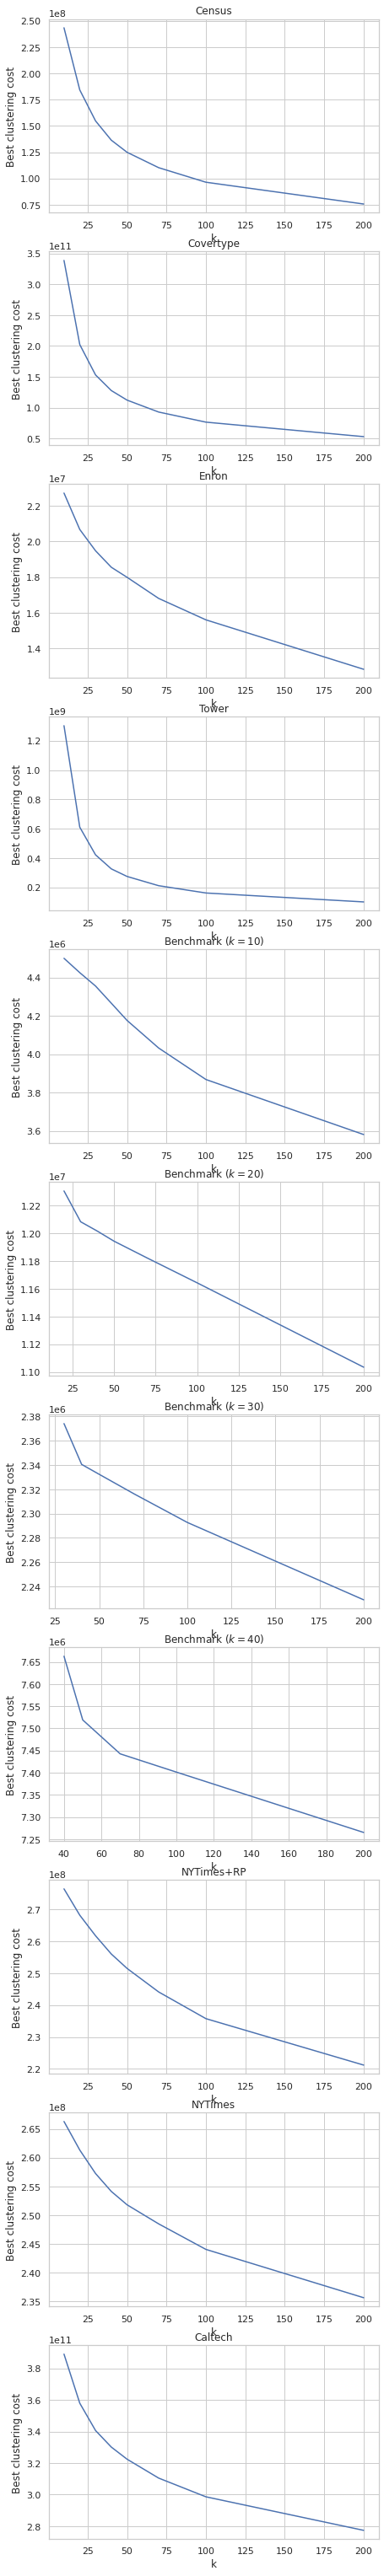

In [9]:
datasets = df_data.dataset.unique()
fig, axes = plt.subplots(nrows=len(datasets), ncols=1, figsize=(7, int(5*len(datasets))))
for i, dataset in enumerate(datasets):
    df_filtered = df_data[df_data.dataset == dataset]
    sns.lineplot(data=df_filtered, x="k", y="cost", ax=axes[i])
    axes[i].set_title(dataset)
    axes[i].set_ylabel("Best clustering cost")
# fig.savefig("best-clustering-costs.pdf")